In [59]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Оценка производной

## Конечные разности

In [110]:
x = np.array([np.random.uniform(0, 10) for _ in range (10)], dtype=complex)
f = lambda x : np.var(x, ddof=1, dtype=complex)

In [ ]:
display(x, f(x))

array([8.39183781, 8.43129664, 7.45279121, 6.20621456, 5.3066316 ,
       3.07104364, 2.31902671, 6.46839474, 9.5736537 , 3.5750211 ])

np.float64(6.133544126285613)

In [61]:
hs = np.array([np.pow(10.0, i) for i in np.arange(-300, 1)], dtype=complex)
derivatives = [(f(x + h * np.eye(1, 10, 4)[0]) - f(x)) / h for h in hs]

In [69]:
(f(x + 0.1 * np.eye(1, 10, 4)[0]) - f(x)) / 0.1

np.float64(0.2094799997711494)

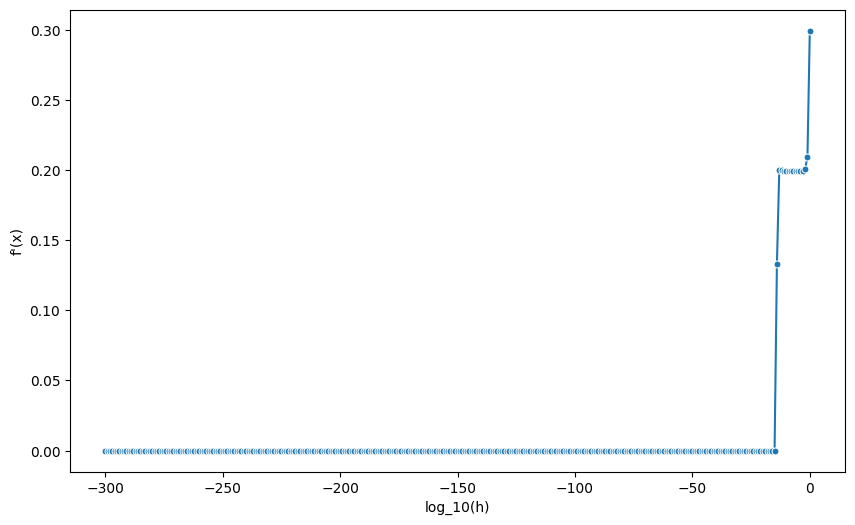

In [88]:
data_q = pd.DataFrame({'x': [i for i in np.arange(-300, 1)], 'y': [a.real for a in derivatives]})

plt.figure(figsize=(10, 6))
sns.lineplot(data=data_q, x='x', y='y', marker='o', markersize=5)
plt.xlabel("log_10(h)")
plt.ylabel("f'(x)")
plt.show();

## Комплексное приращение

In [112]:
derivatives_compl = [(f(x + 1j * h * np.eye(1, 10, 4)[0]) / h).imag for h in hs]

In [118]:

f(x + 1j * 0.1 * np.eye(1, 10, 4)[0])

np.complex128(6.165274726735949+0j)

In [108]:
np.var(x + 1j * 1000 * np.eye(1, 10, 4, dtype=complex)[0], dtype=complex)

np.complex128(90860.95394704671+0j)

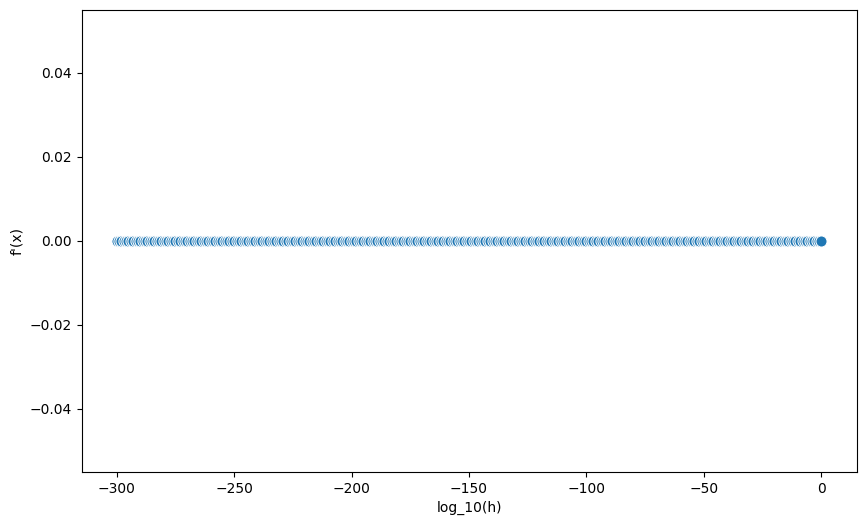

In [109]:
data_q = pd.DataFrame({'x': [i for i in np.arange(-300, 1)], 'y': derivatives_compl})

plt.figure(figsize=(10, 6))
sns.lineplot(data=data_q, x='x', y='y', marker='o', markersize=8)
plt.xlabel("log_10(h)")
plt.ylabel("f'(x)")
plt.show();

# 3. Зависимость погрешности оценки от погрешности входных данных

In [90]:
points_1 = np.random.uniform(0, 1, 100)
points_2 = np.random.uniform(0, 1, 1000)
points_3 = np.random.uniform(0, 1, 10000)

In [100]:
def estimate_expectation_delta(x, delta):
    return delta

def estimate_variance_delta(x, delta):
    n = x.size
    x_mean = x.mean()
    return sum([delta * 2 * np.abs(x[i] - x_mean) / (n - 1) for i in range(n)])

def estimate_median_delta(x, delta):
    return delta

In [94]:
deltas = np.arange(0.01, 0.11, 0.01)

In [103]:
expectation_deltas_1 = [estimate_variance_delta(points_1, delta) for delta in deltas]
expectation_deltas_2 = [estimate_variance_delta(points_2, delta) for delta in deltas]
expectation_deltas_3 = [estimate_variance_delta(points_3, delta) for delta in deltas]

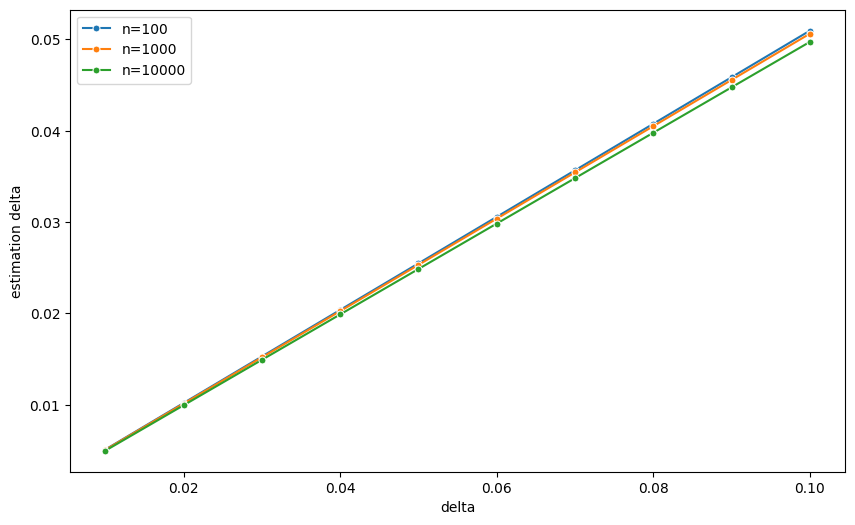

In [105]:
data_1 = pd.DataFrame({'x': deltas, 'y': expectation_deltas_1})
data_2 = pd.DataFrame({'x': deltas, 'y': expectation_deltas_2})
data_3 = pd.DataFrame({'x': deltas, 'y': expectation_deltas_3})

plt.figure(figsize=(10, 6))
sns.lineplot(data=data_1, x='x', y='y', marker='o', markersize=5, label='n=100')
sns.lineplot(data=data_2, x='x', y='y', marker='o', markersize=5, label='n=1000')
sns.lineplot(data=data_3, x='x', y='y', marker='o', markersize=5, label='n=10000')
plt.xlabel("delta")
plt.ylabel("estimation delta")
plt.show();

In [111]:
(1 + 1j)**2

2j